# NEAREST NEIGHBOR ITEM BASED COLLABORATIVE FILTERING

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
movies_df = pd.read_csv('C:/Users/LENOVO/Downloads/Recommendation_complete_tutorial/KNN Movie Recommendation/movies.csv')
movies_df.drop(columns=['genres'], inplace= True)
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
ratings_df = pd.read_csv('C:/Users/LENOVO/Downloads/Recommendation_complete_tutorial/KNN Movie Recommendation/ratings.csv')
ratings_df.drop(columns=['timestamp'], inplace= True)
ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [12]:
print(movies_df.info(), "\n")
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
movieId    9742 non-null int64
title      9742 non-null object
dtypes: int64(1), object(1)
memory usage: 152.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
userId     100836 non-null int64
movieId    100836 non-null int64
rating     100836 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


* movie_id is the common column in between both the datasets
* so we can merge them on movie_id

In [16]:
df = pd.merge(ratings_df, movies_df, on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


Now we make a count of how many users have rated the movie

In [23]:
combined_df = df.dropna(axis=0, subset=['title'])
movie_ratingcount = (combined_df.groupby(by=['title'])['rating'].count().reset_index().rename(columns={'rating':'totalRatingCount'})[['title', 'totalRatingCount']])
movie_ratingcount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


Now we will merge the totalRatingCount column into the df

In [24]:
rating_with_total = combined_df.merge(movie_ratingcount, left_on='title', right_on = 'title', how = 'left')
rating_with_total.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [36]:
print(rating_with_total.shape, "\n")
rating_with_total['totalRatingCount'].describe()

(100836, 5) 



count    100836.000000
mean         58.758777
std          61.965384
min           1.000000
25%          13.000000
50%          39.000000
75%          84.000000
max         329.000000
Name: totalRatingCount, dtype: float64

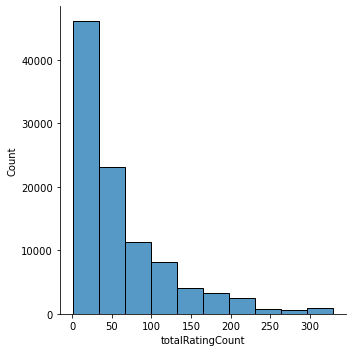

In [34]:
sns.displot(rating_with_total.totalRatingCount,bins=10)

* From the plot we can set threshold or minimum number of ratings for a movie to be 50
* Which means movies which have minimum number of ratings of 50 will be considered for recommendation

In [37]:
threshold = 50 
rating_popular = rating_with_total.query('totalRatingCount >= @threshold')
print("Shape:", rating_popular.shape, "\n ")
rating_popular.head()

Shape: (41362, 5) 
 


,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


Now we create a pivot matrix, we make index as title and columns with userId and fill the values with rating 

In [39]:
df.rating.min()

0.5

In [40]:
movie_features = rating_popular.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


This Pivot table can be convereted to array/ sparse matrix using scipy

In [41]:
from scipy.sparse import csr_matrix

movie_features_matrix = csr_matrix(movie_features.values)

In [47]:
print(movie_features_matrix[:5])

  (0, 11)	5.0
  (0, 18)	3.0
  (0, 66)	4.5
  (0, 90)	5.0
  (0, 102)	5.0
  (0, 109)	4.0
  (0, 130)	4.0
  (0, 151)	1.0
  (0, 156)	3.5
  (0, 174)	4.5
  (0, 179)	4.0
  (0, 195)	1.0
  (0, 197)	5.0
  (0, 216)	2.0
  (0, 233)	5.0
  (0, 246)	3.5
  (0, 257)	4.5
  (0, 271)	3.0
  (0, 272)	4.0
  (0, 277)	4.0
  (0, 283)	3.0
  (0, 295)	2.5
  (0, 304)	0.5
  (0, 313)	3.0
  (0, 322)	3.0
  :	:
  (4, 410)	5.0
  (4, 411)	4.0
  (4, 417)	3.5
  (4, 429)	4.0
  (4, 431)	3.5
  (4, 435)	5.0
  (4, 444)	3.0
  (4, 473)	4.5
  (4, 476)	4.0
  (4, 479)	4.0
  (4, 480)	3.0
  (4, 485)	4.0
  (4, 505)	3.5
  (4, 518)	1.0
  (4, 521)	3.5
  (4, 530)	4.0
  (4, 556)	3.5
  (4, 557)	3.5
  (4, 569)	4.5
  (4, 575)	5.0
  (4, 585)	3.5
  (4, 594)	3.0
  (4, 600)	3.0
  (4, 603)	5.0
  (4, 605)	4.0


Now we are importing the KNN, so that we can use cosine similarity

* cosine similarity is used to find the distance between 2 points in the metric of angle. 
* By default, Nearest Neighbor calculates the distance between the two points in the metric of Euclidean distance.
* WKT cos(0) = 1, cos(90) = 0
* We can plot the 2D vector and find the angle between them and find the angle between that
* For example, the angle between Dark Knight and Superman is found to be 45 degrees, then cos(45) = 0.53, so we can say that 53% of the content matches between them 

Training the model:- Nearest Neighbor is an unsupervised machine learning algorithm which performs similar to KNN 

In [49]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model.fit(movie_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [50]:
movie_features.shape

# There are 450 unique titles and 606 unique users

(450, 606)

Now we shall pick a record and try to recommend to this record

In [68]:
query_index = np.random.choice(movie_features.shape[0])
print(query_index) 

# Here we are trying to pick up a single record from the 450 observations randomly

159


In [69]:
distances, indices = model.kneighbors(movie_features.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)

In [70]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Forrest Gump (1994):

1: Shawshank Redemption, The (1994), with distance of 0.287006938379163:
2: Jurassic Park (1993), with distance of 0.3117414283815536:
3: Pulp Fiction (1994), with distance of 0.3144563273687092:
4: Braveheart (1995), with distance of 0.3569100903432345:
5: Silence of the Lambs, The (1991), with distance of 0.3605374710888958:
